<a href="https://colab.research.google.com/github/diazoniclabs/Machine-Learning-using-sklearn/blob/master/Clustering/K_Means_Clustering_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df.shape

(200, 5)

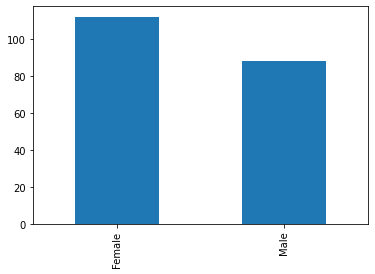

In [48]:
df['Gender'].value_counts().plot(kind='bar')

In [49]:
# COnsidering annual income and spending score

x = df.iloc[:,[3,4]].values

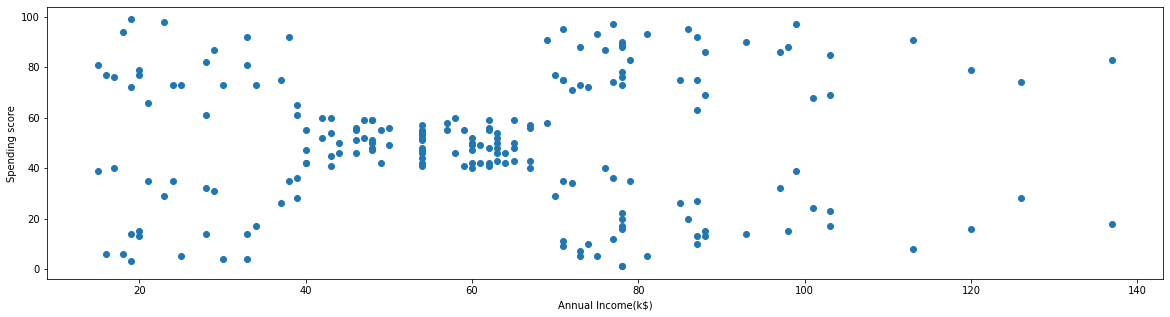

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score')
plt.show()

In [51]:
# Assume the value of k to be 3
k = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=0)
model.fit(x)
y = model.predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [52]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 38, 123,  39]))

In [53]:
# Cluster value : Column Value
# Cluster :0,1,2
# Column = 0-Income, 1-Score

x[y==0,1]

array([29, 35, 11,  9, 34,  5,  7, 10,  5, 40, 12, 36, 22, 17, 20, 16,  1,
        1, 35,  5, 26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,
        8, 16, 28, 18])

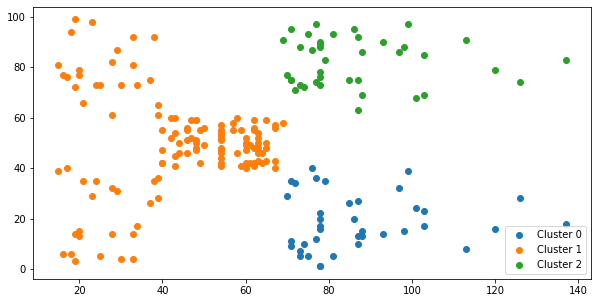

In [54]:
plt.figure(figsize=(10,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label =f'Cluster {i}')
plt.legend()

In [55]:
# Elbow Method
# k value will range between 2 to sq root of the no of rows

import numpy as np
np.sqrt(200)

14.142135623730951

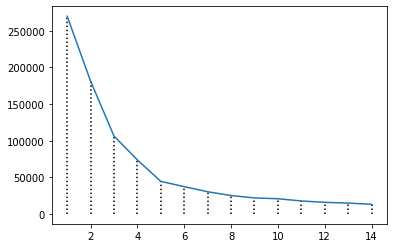

In [56]:
k_demo = range(1,15)
sse = [] # Sum of Squared Error 
for i in k_demo:
  model = KMeans(n_clusters=i,random_state=0)
  model.fit(x)
  sse.append(model.inertia_)
  #print((i,0),(i,model.inertia_))
  plt.plot((i,i),(0,model.inertia_),linestyle=':',c='k')

#plt.scatter(k_demo,sse)
plt.plot(k_demo,sse)
plt.show()

In [58]:
!pip install --upgrade kneed --quiet

In [60]:
from kneed import KneeLocator
kn = KneeLocator(k_demo, sse, curve='convex', direction='decreasing')
elbow_point = kn.knee
elbow_point

5

In [ ]:
x[0][1]

In [69]:
# Within sum of Squared Errors for 1 cluster
x1m = x[:,0].mean()
x2m = x[:,1].mean()
a1 = []
a2 = []
for i in range(len(x)):
  a1.append((x[i][0]-x1m)**2)
  a2.append((x[i][1]-x2m)**2)
np.sum(a1+a2)

269981.28

In [67]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(x)
model.inertia_

181363.59595959593

In [ ]:
# Evaluation

# Silhoutte coefficient
# -1 to +1
# Near to -1  means model is clustered poorly
# +1 indicates model is performing good

In [ ]:
from sklearn.metrics import silhouette_score
k_demo = range(2,15)
for i in k_demo:
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(x)
    y = model.predict(x)
    print(f'{i} Clusters - {silhouette_score(x,y)}') 
    plt.bar(i,silhouette_score(x,y))
plt.show()

In [ ]:
# Complete visualization for different k value
k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k,random_state=0)
model.fit(x)
y = model.predict(x)

plt.figure(figsize=(20,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label =f'Cluster {i}',s=70)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow')
plt.legend()
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score')
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=AGRMQ07KCrU&ab_channel=RANJIRAJ

In [70]:
from scipy.spatial.distance import pdist,squareform
from sklearn.metrics import pairwise_distances

In [71]:
dist = pdist(df[['Annual Income (k$)','Spending Score (1-100)']],metric='euclidean')
dist_matrix = pd.DataFrame(squareform(dist))
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,42.000000,33.015148,38.013156,2.236068,37.054015,33.136083,55.081757,36.221541,33.241540,...,89.442719,92.973114,102.786186,110.941426,107.489534,112.361025,111.543713,116.387285,123.794184,129.691943
1,42.000000,0.000000,75.006666,4.123106,41.048752,5.385165,75.059976,13.341664,78.102497,9.848858,...,105.394497,88.814413,122.200655,98.508883,123.490890,105.019046,123.004065,111.220502,137.306227,122.016392
2,33.015148,75.006666,0.000000,71.000000,34.014703,70.007142,2.000000,88.022724,4.242641,66.068147,...,88.645361,107.415083,97.020616,128.972865,104.479663,127.062977,112.178429,129.321305,121.593585,143.422453
3,38.013156,4.123106,71.000000,0.000000,37.013511,1.414214,71.028163,17.117243,74.060786,5.830952,...,102.396289,87.367042,119.037809,98.005102,120.569482,104.019229,120.420098,110.040901,134.617978,121.148669
4,2.236068,41.048752,34.014703,37.013511,0.000000,36.000000,34.014703,54.009258,37.054015,32.062439,...,87.664132,90.757920,101.192885,108.706026,105.759160,110.136279,109.658561,114.179683,122.000000,127.471565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,112.361025,105.019046,127.062977,104.019229,110.136279,103.043680,125.431256,103.097042,126.400158,101.242284,...,58.523500,19.723083,71.344236,13.892444,63.000000,0.000000,51.351728,7.810250,63.324561,17.464249
196,111.543713,123.004065,112.178429,120.420098,109.658561,119.100798,110.217966,126.570139,109.881755,115.693561,...,23.537205,47.010637,23.853721,64.327288,13.416408,51.351728,0.000000,46.000000,14.866069,56.089215
197,116.387285,111.220502,129.321305,110.040901,114.179683,109.018347,127.624449,109.836242,128.413395,107.018690,...,55.946403,23.537205,67.268120,21.400935,58.309519,7.810250,46.000000,0.000000,57.070132,14.212670
198,123.794184,137.306227,121.593585,134.617978,122.000000,133.281657,119.603512,141.198442,118.949569,129.769026,...,34.365681,61.294372,26.000000,76.843998,17.117243,63.324561,14.866069,57.070132,0.000000,65.000000
